<a href="https://colab.research.google.com/github/ShivakumarRavi/Lending_club_case_study/blob/main/lending_club_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lending Club Case Study**
### **Introduction:**
The Lending Club Loan Approval Analysis case study involves the examination of a dataset named "loan.csv" to determine whether a particular person's loan application should be approved or denied. Lending Club is a peer-to-peer lending platform that connects borrowers with investors. The goal of this analysis is to perform an Exploratory Data Analysis (EDA) to gain insights into the dataset.

### **Dataset Overview:**
The dataset "loan.csv" contains a comprehensive set of information about past loan applicants, including various attributes such as credit scores, employment details, loan amounts, interest rates, loan status, and more. Each row in the dataset represents a unique loan application.

**Key Objectives:**

1.   **Data Preprocessing:** Cleanse and prepare the dataset by handling missing values, outliers, and data formatting issues.
2.   **Exploratory Data Analysis (EDA):** Perform an in-depth analysis of the dataset to understand the patterns, relationships, and trends within the data.
3.   **Data Visualization:** Create visualizations such as histograms, scatter plots, and correlation matrices to visualize the data and gain insights.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## **Data understanding**

In [ ]:
data = pd.read_csv("drive/MyDrive/Colab Notebooks/Lending Club Case Study/loan.csv")
print("Data Shape: {}".format(data.shape))
print("Data Size:".format(data.size))
print("INFO: ")
print(data.info())

Data Shape: (39717, 111)
Data Size:
INFO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


Print first 5 rows of the dataset to see the overview of the data

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## **Data Cleaning**

From the above block, we understood from the data set, we have 111 features and 39717 data about past loan applications.


1.   As a first step, Check how many columns are having null values and it's values.



In [ ]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

There is much intresting fact about from this dataset is, we have more feature columns having NA values and those values doesn't help for our analysis. So, dropping column having only NA.

In [ ]:
data.dropna(axis=1, how='all', inplace=True)

Now, Lets drop the rows having only null or na values

In [ ]:
data.dropna(axis=0, how='all', inplace=True)

Let's check the dataset shape now.

In [ ]:
data.shape

(39717, 57)

After dropping few column, from the dataset we identify that, few columns having only single values accross the data's. those columns are also doesn't help for the analysis. So, dropping those columns.

In [ ]:
data.loc[:, data.nunique() == 1]

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
39712,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39713,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39714,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39715,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN


In [ ]:
data.drop(data.loc[:, data.nunique() == 1], axis=1, inplace=True)

Let's check any of the feature having more than 50% of the null values, if any drop those columns.

In [ ]:
data.loc[data.isnull().sum(axis=1) > (data.shape[1]/2),:].shape

(0, 48)

In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

From the filtered data, found few columns are ir-revelent to analysis. so we can drop the column to avoid confusion
And also, few columns are related the post approval loan related variables, these post approval variables are doesn't help for finding the "defaulters", so removing those too.

Reason for dropping below Columns:

1.   id: id column doesn't help for analysis since it was a unique variable.
2.   member_id: similar to id column.
3.   funded_amount: fund quoted in the request form doesn't help for analysis.
4.   emp_title: Borrower job title can't be a deciding factor.
5.   url: url of the record doesn't help for the analysis.
6.   desc: description given by borrower can be anything, this doesn't help for analysis.
7.   title: We can't decide anything with the title given by the borrower.
8.   zip_code: Instead of using the zip code vise, we can check by state.
9.   delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file (Post Approval process)
10.  mths_since_last_delinq: The number of months since the borrower's last delinquency. (Post Approval process)
11.  mths_since_last_record: The number of months since the last public record. (Post Approval process)
12.  revol_bal: Total credit revolving balance (Post Approval process)
13.  out_prncp: outstanding principal (Post Approval process)
14.  out_prncp_inv: outstanding principal for portion of total amount funded by investors (Post Approval process)
15.  total_pymnt: Payments received to date (Post Approval process)
16.  total_pymnt_inv: Payments received to date for portion of total amount funded by investors (Post Approval process)
17.  total_rec_prncp: Principal received to date (Post Approval process)
18.  total_rec_int: Interest received to date (Post Approval process)
19.  total_rec_late_fee: Late fees received to date (Post Approval process)
20.  recoveries: post charge off gross recovery (Post Approval process)
21.  collection_recovery_fee: post charge off collection fee (Post Approval process)
22.  last_pymnt_d: Last month payment was received (Post Approval process)
23.  last_pymnt_amnt: Last total payment amount received (Post Approval process)
24.  next_pymnt_d: Next scheduled payment date (Post Approval process)
25.  last_credit_pull_d: The most recent month LC pulled credit for this loan (Post Approval process)

In [ ]:
data.drop(["id", "member_id", "funded_amnt", "emp_title", "url", "desc", "title", "zip_code", "delinq_2yrs", "mths_since_last_delinq", "mths_since_last_record", "revol_bal", "out_prncp", "out_prncp_inv", 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', "collection_recovery_fee", 'last_pymnt_d', 'last_pymnt_amnt','next_pymnt_d', "last_credit_pull_d"], inplace=True, axis="columns")

In [ ]:
data.shape

(39717, 23)

In [ ]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,car,GA,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,other,CA,20.00,Feb-96,1,10,0,21%,37,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,other,OR,17.94,Jan-96,0,15,0,53.90%,38,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

## **Data Manipulation**

Lets identify the percentage of null values in the rest of the columns

In [ ]:
na_column_list = data.columns[data.isna().any()].tolist()
data[na_column_list].isna().sum()/data[na_column_list].count() * 100

emp_length              2.781947
revol_util              0.126049
pub_rec_bankruptcies    1.786263
dtype: float64

We observed that, percentage of null values are not much more in the above 3 columns. So, we can either drop or replace with mean/median/mode values accordingly.

In [ ]:
data.drop(index=data[data['revol_util'].isna()].index, inplace=True)

In [ ]:
data['pub_rec_bankruptcies'].fillna(value=data['pub_rec_bankruptcies'].mode()[0], inplace=True)

In [ ]:
data["emp_length"].fillna(value=data['emp_length'].mode()[0], inplace=True)

### **Type-driven metrics**

In [ ]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

We observed from the data, emp_length doesn't have proper integer values, so lets remake the column with int values instead of string. it's help for much easy analysis.

In [ ]:
data['emp_length'] = data['emp_length'].apply(lambda x: 10 if "+" in x else 0 if "<" in x else str(x).split("year")[0].strip())

In [ ]:
data["term"] = data["term"].apply(lambda x: str(x).split("months")[0].strip())

In [ ]:
data["int_rate"] = data["int_rate"].apply(lambda x: str(x).split("%")[0].strip())

In [ ]:
data['revol_util'] = data['revol_util'].apply(lambda x: str(x).split("%")[0].strip())

Since term, int_rate, emp_length and revol_util columns are the type "Object", it very hard to do the analysis with this type. So, lets change the data types.

In [ ]:
data["term"] = data["term"].astype(dtype="int")
data["int_rate"] = data["int_rate"].astype(dtype="float")
data["emp_length"] = data['emp_length'].astype(dtype="int")
data["revol_util"] = data["revol_util"].astype(dtype="float")

### **Data-driven metrics**
We have a column called "issue_d" which is the format of MMM-YY, we can extract the month and year value, so it will be easier for analysis.

In [ ]:
data['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [ ]:
data['issue_year'] = data['issue_d'].apply(lambda x: str(x).split("-")[1])

In [ ]:
data['issue_month'] = data['issue_d'].apply(lambda x: str(x).split("-")[0])

### **Business-driven metrics**
We observed from the data "home_ownership", it has value "NONE", which doesn't make sense at all, so converting the NONE value into OTHER category

In [ ]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [ ]:
data['home_ownership'].replace(to_replace = 'NONE',value='OTHER', inplace=True)

In [ ]:
data.describe()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
count,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,3.966700e+04,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000
mean,11227.664053,10405.885280,42.424282,12.016587,324.770793,5.111629,6.899952e+04,13.318704,0.869211,9.300250,0.055084,48.832152,22.103411,0.042529
std,7456.610740,7128.338379,10.626110,3.723856,208.882852,3.607591,6.378947e+04,6.676975,1.070422,4.398866,0.237247,28.332634,11.398386,0.202668
min,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5000.000000,36.000000,9.250000,167.080000,2.000000,4.051632e+04,8.180000,0.000000,6.000000,0.000000,25.400000,14.000000,0.000000
50%,10000.000000,8975.000000,36.000000,11.830000,280.610000,5.000000,5.900000e+04,13.410000,1.000000,9.000000,0.000000,49.300000,20.000000,0.000000
75%,15000.000000,14400.000000,60.000000,14.540000,430.780000,10.000000,8.240000e+04,18.600000,1.000000,12.000000,0.000000,72.400000,29.000000,0.000000
max,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,99.900000,90.000000,2.000000


## **Outlier analysis**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cf37019600>,
 'caps': [<matplotlib.lines.Line2D at 0x79cf37019060>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cf37019840>],
 'medians': [<matplotlib.lines.Line2D at 0x79cf37018910>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cf370186a0>],
 'means': []}

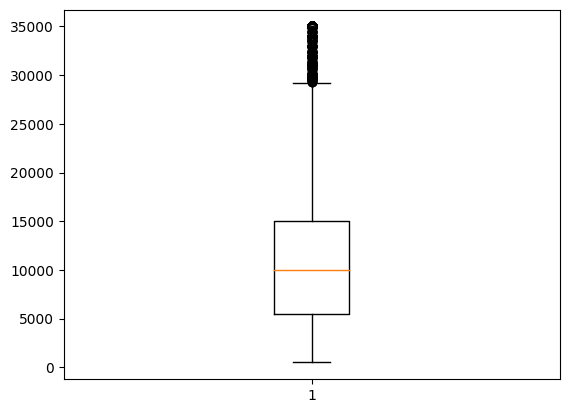

In [ ]:
plt.boxplot(x=[data['loan_amnt']])

Here we have a clean notation of outlier in the loan amount feature. Lets clear the outlier values.

In [ ]:
data['loan_amnt'].describe(percentiles=[0.1, 0.5, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])

count    39667.000000
mean     11227.664053
std       7456.610740
min        500.000000
10%       3200.000000
50%      10000.000000
80%      16750.000000
90%      22000.000000
95%      25000.000000
96%      25500.000000
97%      30000.000000
98%      31500.000000
99%      35000.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [ ]:
data = data[data['loan_amnt'] < data['loan_amnt'].quantile(q=0.96)]

{'whiskers': [<matplotlib.lines.Line2D at 0x79cf3701a050>,
 'caps': [<matplotlib.lines.Line2D at 0x79cf36529cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cf365298d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79cf3652a200>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cf3652a4a0>],
 'means': []}

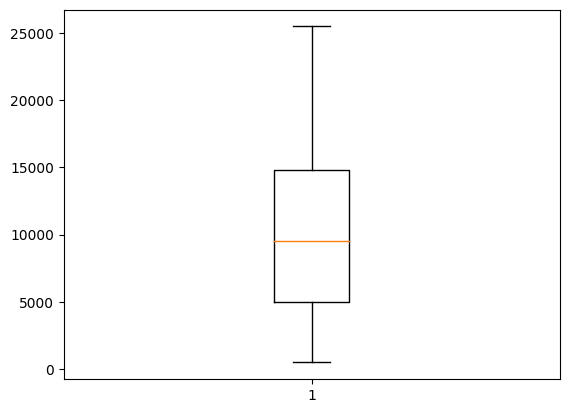

In [ ]:
plt.boxplot(x=[data['loan_amnt']])

Now, let repeat the same analysis for few other features to detect the outlier.

{'whiskers': [<matplotlib.lines.Line2D at 0x79cf36594610>,
 'caps': [<matplotlib.lines.Line2D at 0x79cf36594a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cf36594370>],
 'medians': [<matplotlib.lines.Line2D at 0x79cf36594f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cf36595210>],
 'means': []}

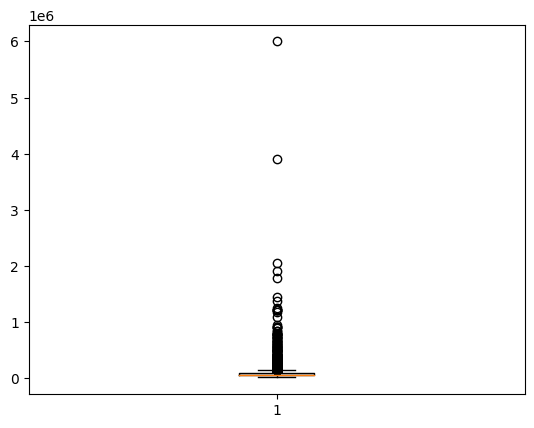

In [ ]:
plt.boxplot(data['annual_inc'])

In [ ]:
data['annual_inc'].quantile([0.1, 0.5, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])

0.10      30000.0
0.50      57000.0
0.80      87950.0
0.90     110000.0
0.95     135090.0
0.96     145000.0
0.97     157500.0
0.98     180000.0
0.99     215000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [ ]:
data = data[data['annual_inc'] < data['annual_inc'].quantile(q=0.90)]

{'whiskers': [<matplotlib.lines.Line2D at 0x79cf365dff70>,
 'caps': [<matplotlib.lines.Line2D at 0x79cf36596aa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cf365dfcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x79cf365f4400>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cf365f46a0>],
 'means': []}

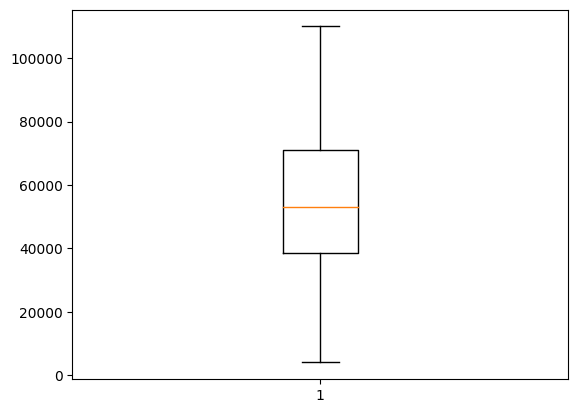

In [ ]:
plt.boxplot(data['annual_inc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79cf364327d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79cf36432bf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cf36432530>],
 'medians': [<matplotlib.lines.Line2D at 0x79cf36433130>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cf364333d0>],
 'means': []}

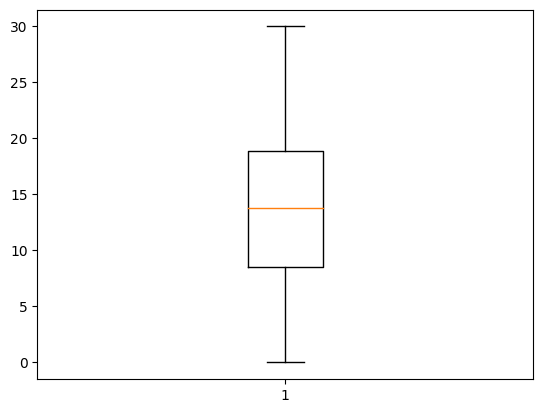

In [ ]:
plt.boxplot(data['dti'])

In [ ]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [ ]:
data.describe()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
count,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000
mean,9900.841540,9200.472000,41.948670,11.836006,289.979223,4.982420,55629.610554,13.584916,0.859591,9.029281,0.058239,48.522367,20.986565,0.044892
std,5998.457288,5762.375400,10.362652,3.608353,173.011423,3.580519,22301.487053,6.676922,1.059102,4.298605,0.243190,28.198887,10.939550,0.207920
min,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4000.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5000.000000,4896.445708,36.000000,8.940000,158.720000,2.000000,38500.000000,8.490000,0.000000,6.000000,0.000000,25.200000,13.000000,0.000000
50%,8875.000000,8000.000000,36.000000,11.710000,259.000000,4.000000,53000.000000,13.750000,1.000000,8.000000,0.000000,48.800000,19.000000,0.000000
75%,14000.000000,12500.000000,36.000000,14.270000,386.700000,9.000000,71000.000000,18.890000,1.000000,11.000000,0.000000,71.800000,27.000000,0.000000
max,25475.000000,25475.000000,60.000000,24.400000,945.350000,10.000000,109995.000000,29.990000,8.000000,42.000000,4.000000,99.900000,87.000000,2.000000


In [ ]:
data.corr()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.927706,0.317129,0.245394,0.926536,0.117556,0.363225,0.106980,-0.001131,0.163648,-0.042104,0.074597,0.218030,-0.028261
funded_amnt_inv,0.927706,1.000000,0.330024,0.252385,0.884524,0.134540,0.340460,0.116269,-0.016776,0.148151,-0.043999,0.085826,0.206143,-0.028686
term,0.317129,0.330024,1.000000,0.423588,0.041443,0.096324,0.064530,0.080244,0.039718,0.042406,0.014276,0.062612,0.080935,0.018508
int_rate,0.245394,0.252385,0.423588,1.000000,0.225902,-0.025815,0.027789,0.097937,0.134925,-0.024573,0.107184,0.470040,-0.092867,0.088187
installment,0.926536,0.884524,0.041443,0.225902,1.000000,0.085475,0.355674,0.091168,-0.000140,0.152823,-0.037021,0.107122,0.185860,-0.024683
emp_length,0.117556,0.134540,0.096324,-0.025815,0.085475,1.000000,0.165478,0.054449,0.007071,0.082634,0.077415,-0.001843,0.196665,0.075975
annual_inc,0.363225,0.340460,0.064530,0.027789,0.355674,0.165478,1.000000,-0.045007,0.032091,0.262029,0.001708,0.043835,0.372485,0.004752
dti,0.106980,0.116269,0.080244,0.097937,0.091168,0.054449,-0.045007,1.000000,0.006531,0.300496,-0.007214,0.269019,0.251612,0.004084
inq_last_6mths,-0.001131,-0.016776,0.039718,0.134925,-0.000140,0.007071,0.032091,0.006531,1.000000,0.090284,0.026042,-0.068333,0.106645,0.015407
open_acc,0.163648,0.148151,0.042406,-0.024573,0.152823,0.082634,0.262029,0.300496,0.090284,1.000000,0.007987,-0.107640,0.681362,0.012608


We are not much clear with the numeric values, lets visually see the correlation of final data set.

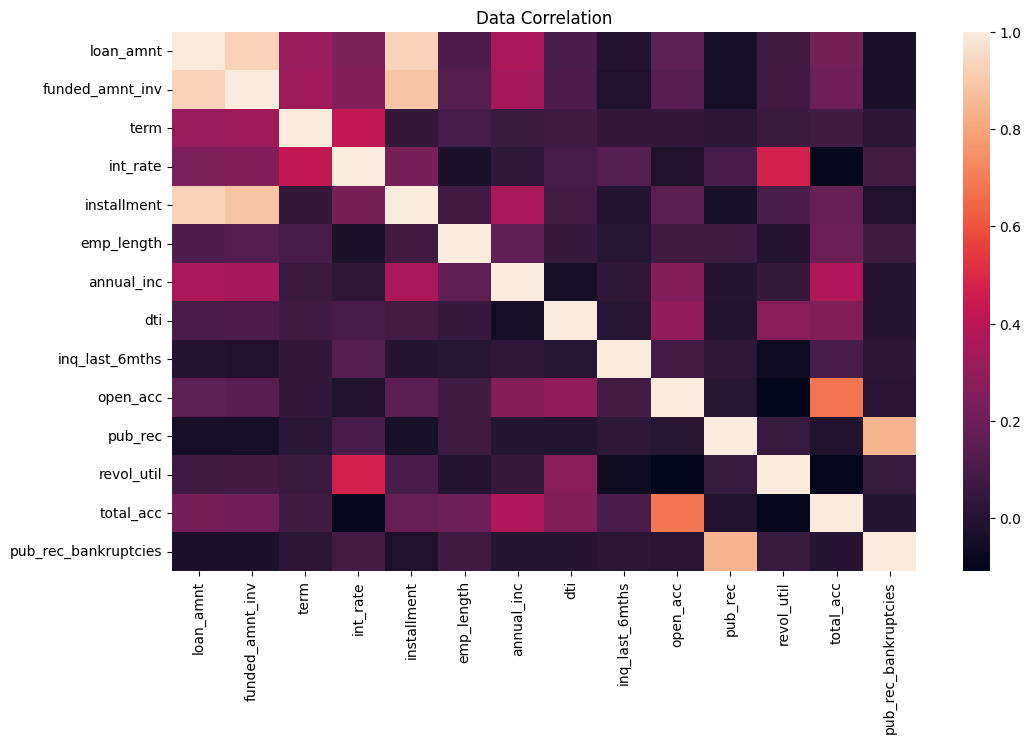

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr())
plt.title("Data Correlation")
plt.show()

Now, we are ready to get more insight into the data via some visualization. by this way, we can predict "defaulters" in quick way.

First, see the distribution accross catagorical data

### **Univariate and segmented univariate analysis**

Text(0.5, 1.0, 'Loan Status Distribution')

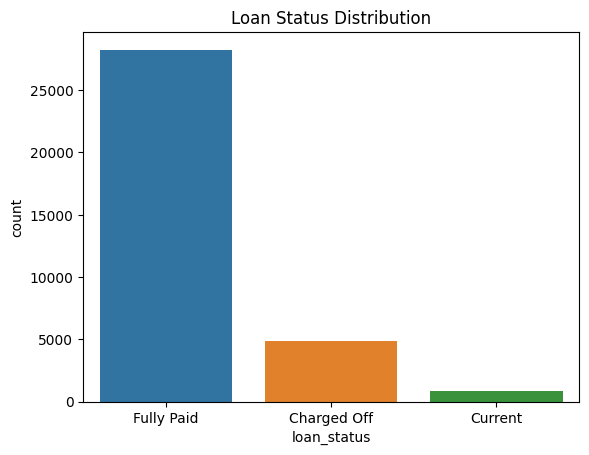

In [ ]:
sns.countplot(data=data, x="loan_status")
plt.title("Loan Status Distribution")

From the above visualization, most of the borrowers from this finance company are paid their amount back, but few of them are marked as "Charged Off"

In [ ]:
data['annual_inc'].describe()

count     34015.000000
mean      55629.610554
std       22301.487053
min        4000.000000
25%       38500.000000
50%       53000.000000
75%       71000.000000
max      109995.000000
Name: annual_inc, dtype: float64

In [ ]:
data['annual_inc_groups'] = pd.cut(data['annual_inc'], bins=6,labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k','100k - above'])

Text(0.5, 1.0, 'Annual Income group distribution for charged off status')

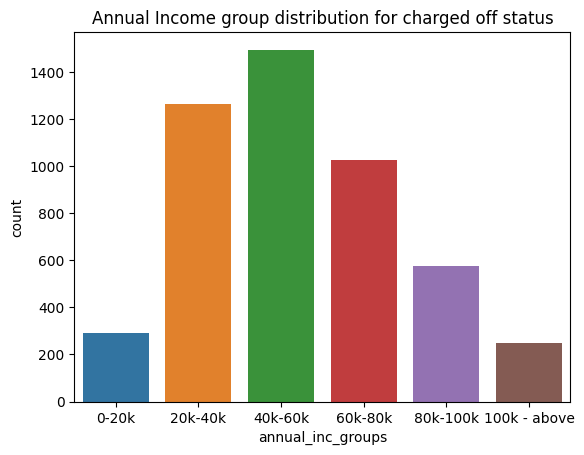

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='annual_inc_groups')
plt.title("Annual Income group distribution for charged off status")

Text(0.5, 1.0, 'Grade distribution')

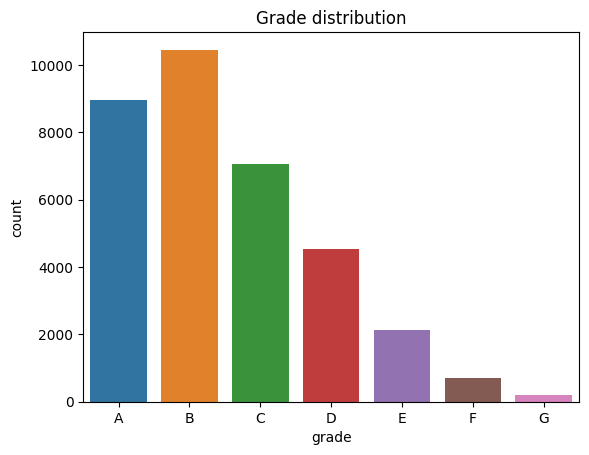

In [ ]:
sns.countplot(data=data, x="grade", order=sorted(data['grade'].unique()))
plt.title("Grade distribution")

Text(0.5, 1.0, 'Grade distribution for Charged Off status')

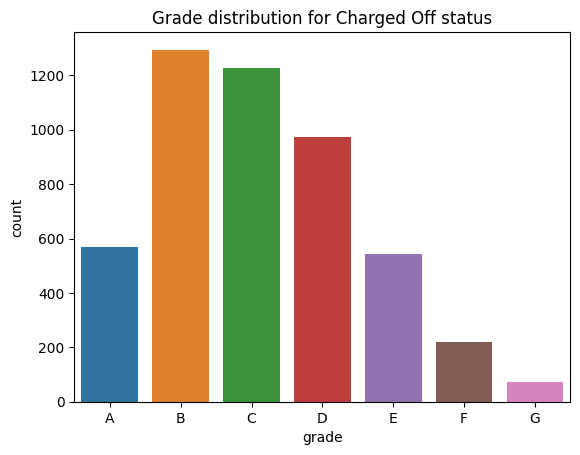

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x="grade", order=sorted(data['grade'].unique()))
plt.title("Grade distribution for Charged Off status")

Text(0.5, 1.0, 'Sub Grade distribution for Charged Off status')

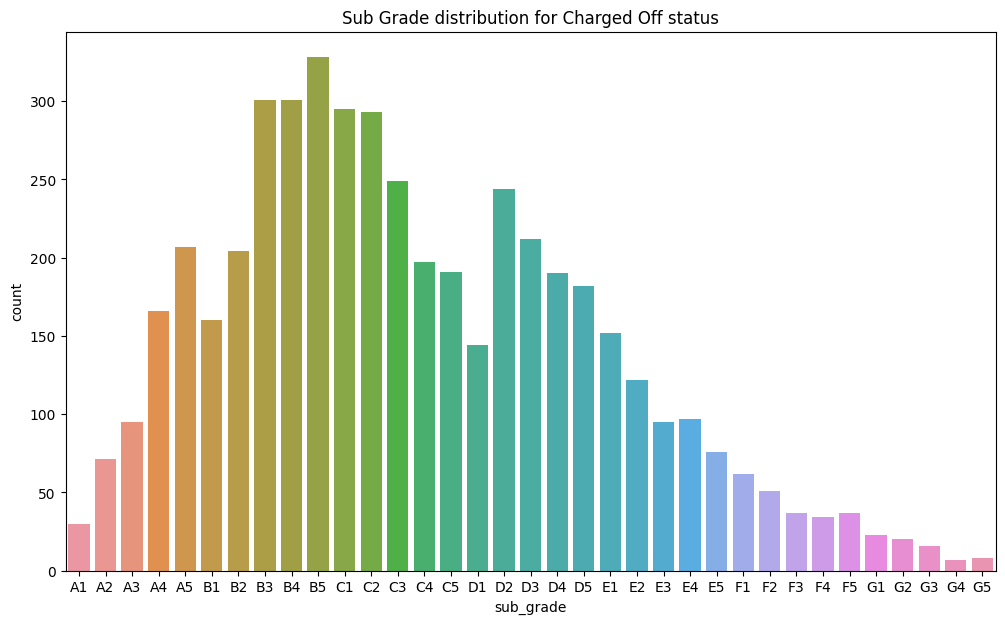

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='sub_grade', order = sorted(data['sub_grade'].unique()))
plt.title("Sub Grade distribution for Charged Off status")

From the above observation, people who belongs to the group "B, C, D" are mostly comes under "defaulters"

Text(0.5, 1.0, 'Home Ownership distribution')

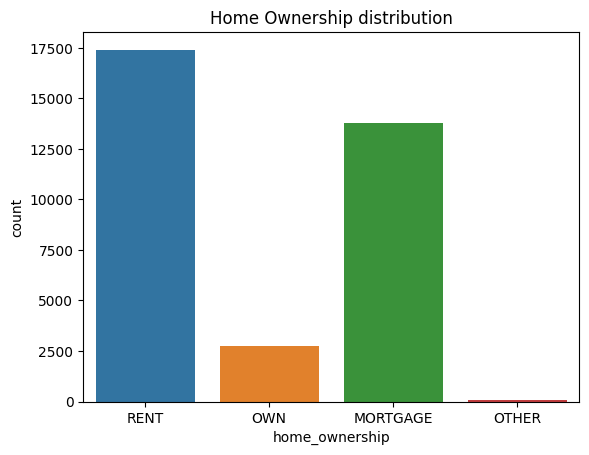

In [ ]:
sns.countplot(data=data, x='home_ownership')
plt.title("Home Ownership distribution")

Text(0.5, 1.0, 'Home Ownership distribution for Charged Off status')

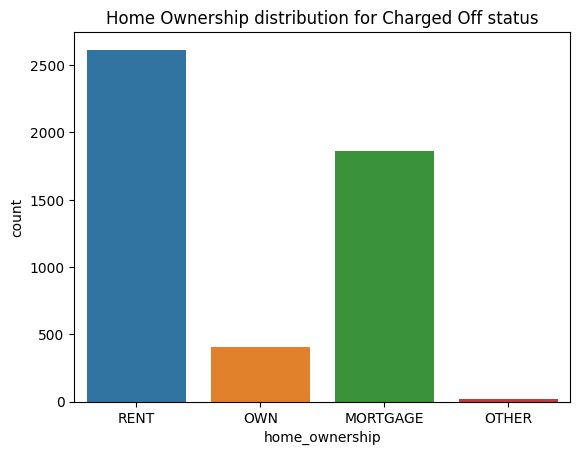

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='home_ownership')
plt.title("Home Ownership distribution for Charged Off status")

From the above observation, we can say that, people who has RENT and MORTGAGE home are falls under "defaulters".

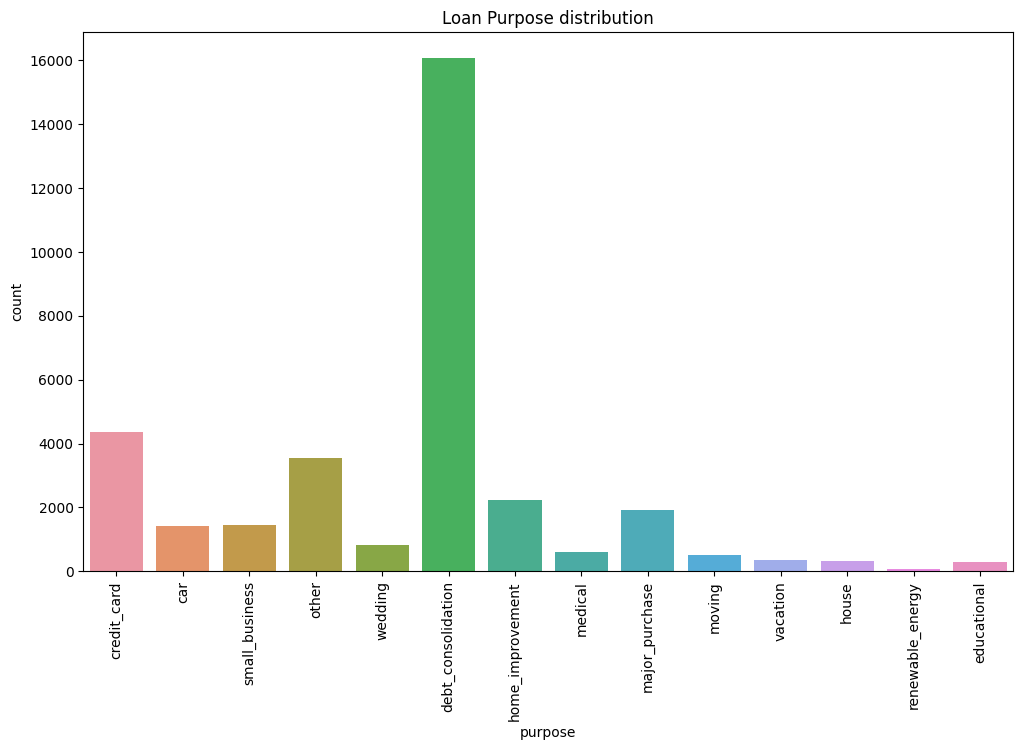

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='purpose')
plt.xticks(rotation=90)
plt.title("Loan Purpose distribution")
plt.show()

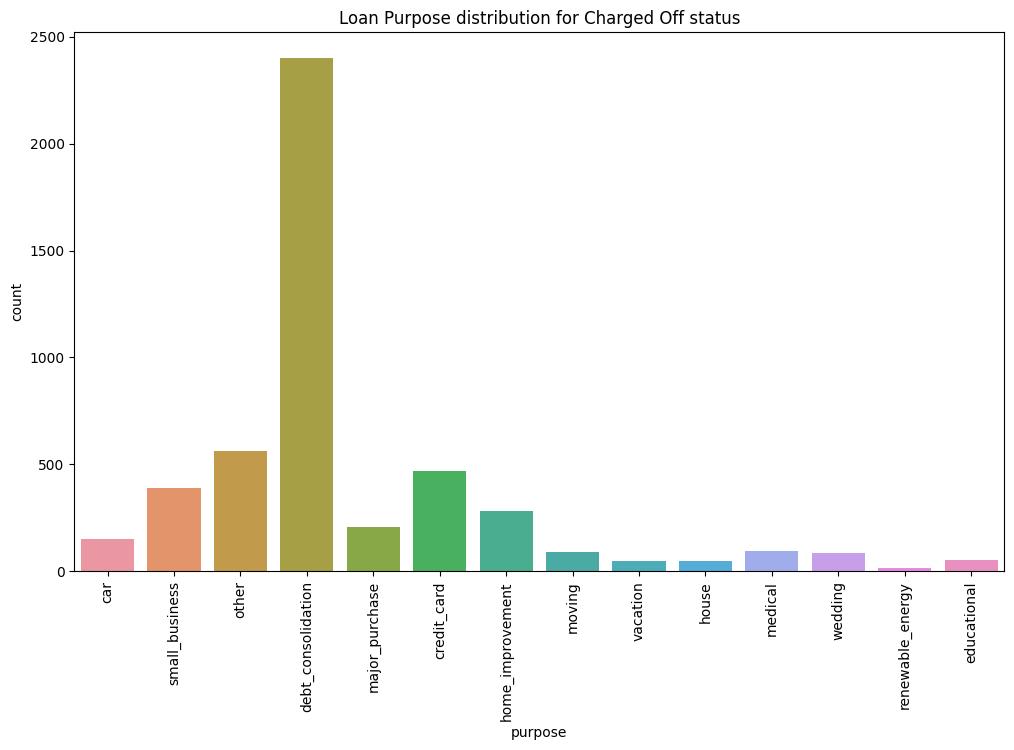

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='purpose')
plt.xticks(rotation=90)
plt.title("Loan Purpose distribution for Charged Off status")
plt.show()

From above observation, poeple who taken the loan for the purpose of debt_consolidation are mostly not repaying the amount.

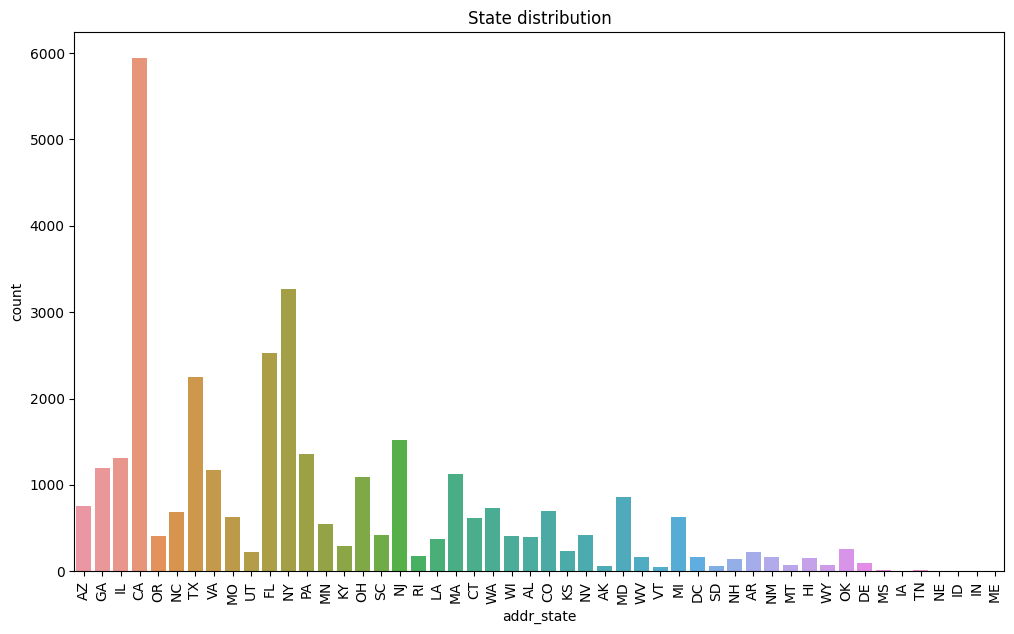

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='addr_state')
plt.title("State distribution")
plt.xticks(rotation=90)
plt.show()

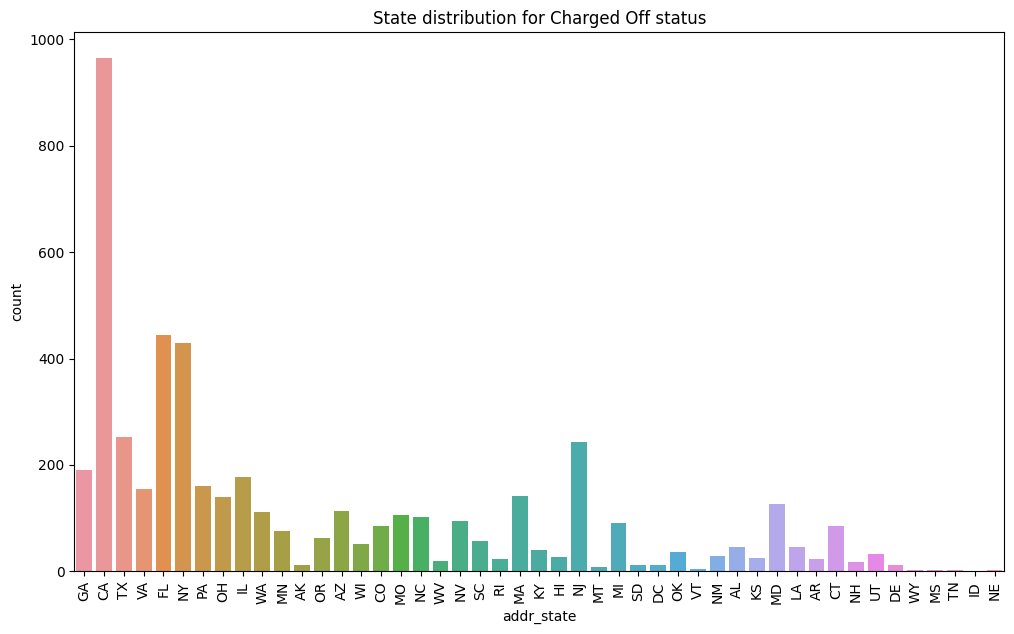

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='addr_state')
plt.title("State distribution for Charged Off status")
plt.xticks(rotation=90)
plt.show()

From the above visualization, we can say that, people who took loan from the state "CA" not mostly not repaying the amount back.

Text(0.5, 1.0, 'Verification Status distribution')

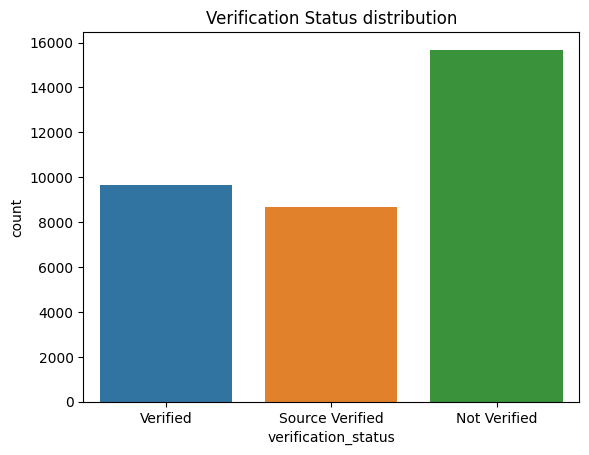

In [ ]:
sns.countplot(data=data, x='verification_status')
plt.title("Verification Status distribution")

Text(0.5, 1.0, 'Verification Status distribution for Charged Off status')

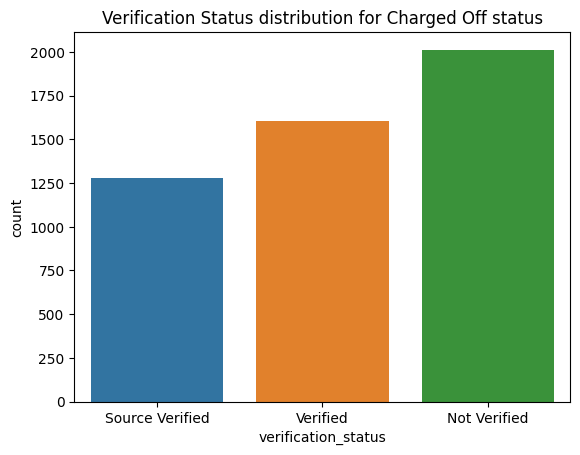

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='verification_status')
plt.title("Verification Status distribution for Charged Off status")

If the income source was not verified, then most probabily getting defaulters.

Text(0.5, 1.0, 'Loan issued year distribution')

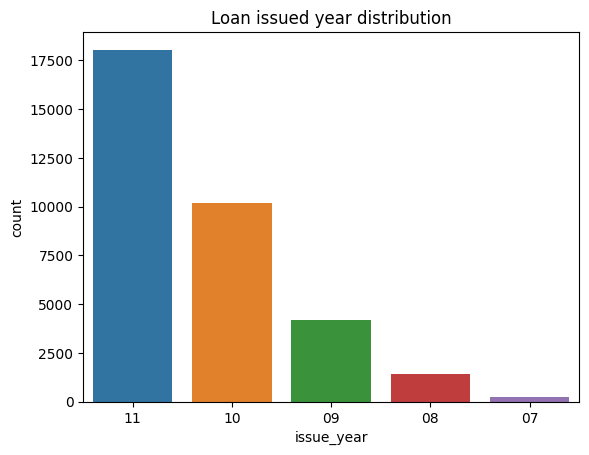

In [ ]:
sns.countplot(data=data, x='issue_year')
plt.title("Loan issued year distribution")

Text(0.5, 1.0, 'Loan issued month distribution')

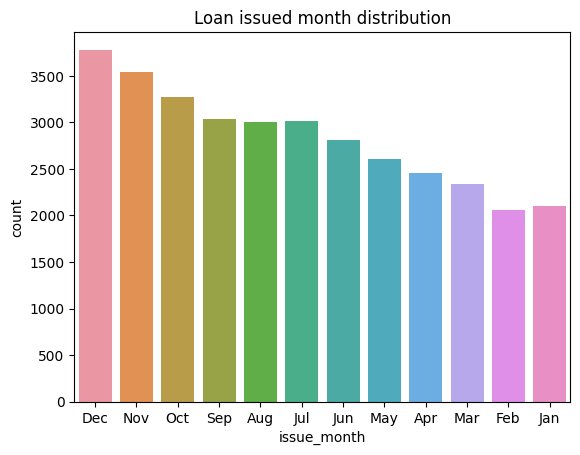

In [ ]:
sns.countplot(data=data, x='issue_month')
plt.title("Loan issued month distribution")

it's clearly visible, most of the loans are approved during Dec 2011.

Text(0.5, 1.0, 'Loan issue Month at year 2011 distribution')

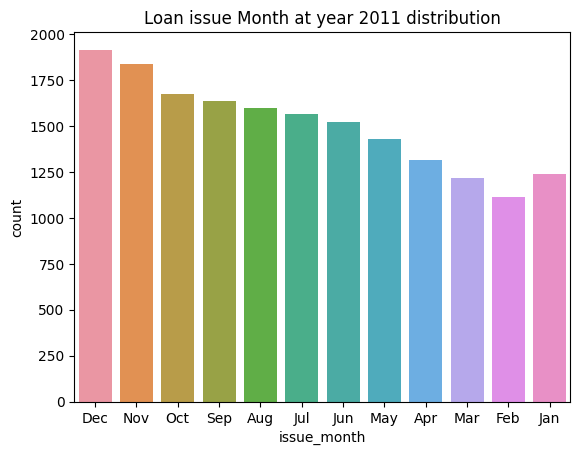

In [ ]:
sns.countplot(data=data[data.issue_year == '11'], x='issue_month')
plt.title("Loan issue Month at year 2011 distribution")

Text(0.5, 1.0, 'Loan issue Month at year 2011 distribution for Charged Off status')

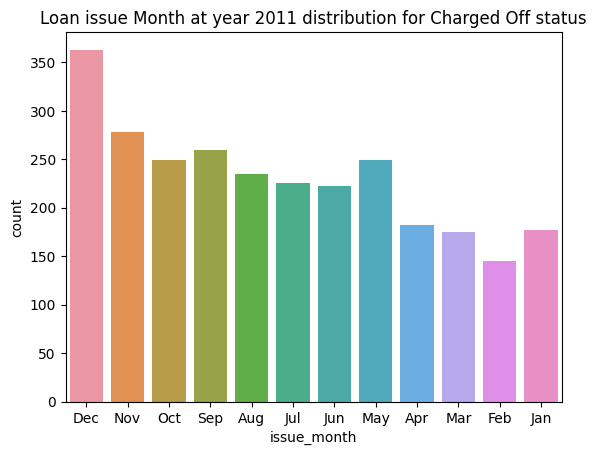

In [ ]:
sns.countplot(data=data[(data.issue_year == '11') & (data.loan_status == 'Charged Off')], x='issue_month')
plt.title("Loan issue Month at year 2011 distribution for Charged Off status")

it's clear that, most of the loan are issues at the month of Nov and Dec and people who brought the loan amount at the time of December, who not repay the amount

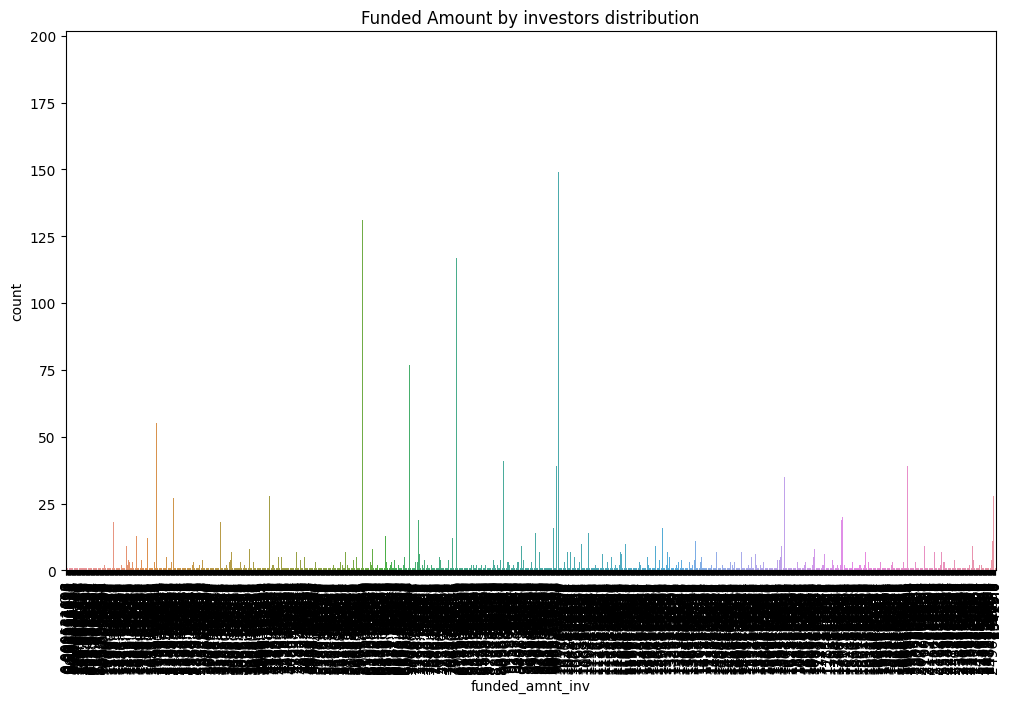

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='funded_amnt_inv')
plt.title("Funded Amount by investors distribution")
plt.xticks(rotation=90)
plt.show()

The data is not clear in this graph, since we have more data in it, so let's group the values into bins

In [ ]:
data['funded_amnt_inv_group'] = pd.cut(data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

Text(0.5, 1.0, 'Funded Amount by investors group distribution')

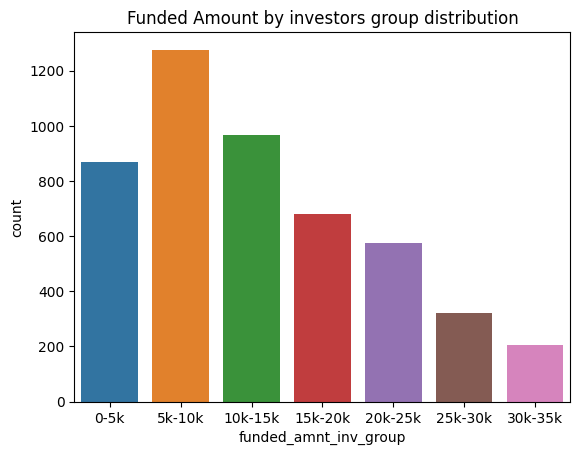

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='funded_amnt_inv_group')
plt.title("Funded Amount by investors group distribution")

Now, it's much clear, who brought the loan between 5k-10k are not repaying the amount.

In [ ]:
data['dti_groups'] = pd.cut(data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

Text(0.5, 1.0, 'Debt to Income groups distribution for charged off status')

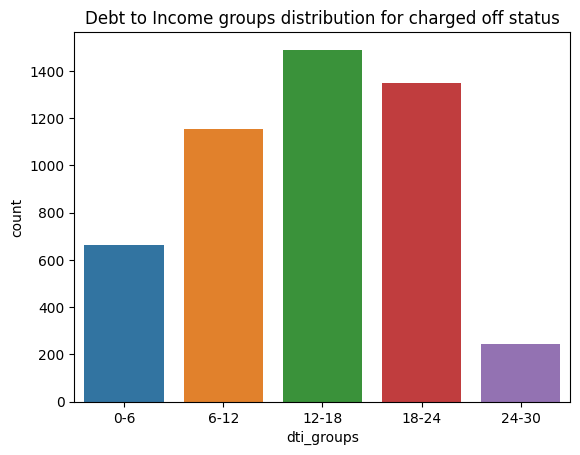

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='dti_groups')
plt.title("Debt to Income groups distribution for charged off status")

people who having the dti 12-18 range in their credit file are mostly falls under "defaulters".

In [ ]:
data['open_acc_groups'] = pd.cut(data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

Text(0.5, 1.0, 'open account group distribution for charged off status')

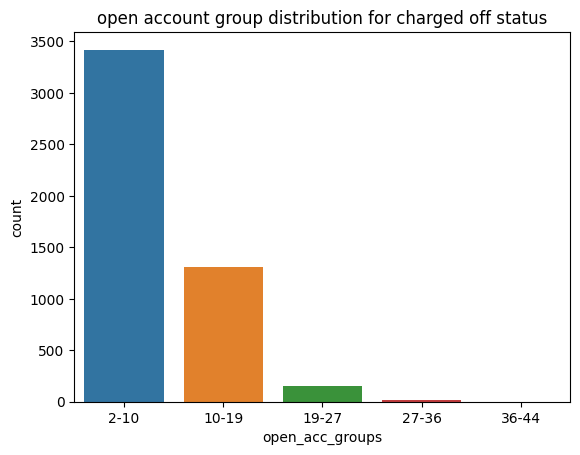

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='open_acc_groups')
plt.title("open account group distribution for charged off status")

From the above visualization, we can say that, people who have between 2-10 open credit lines in the borrower's credit file are mostly not repaying the amount.

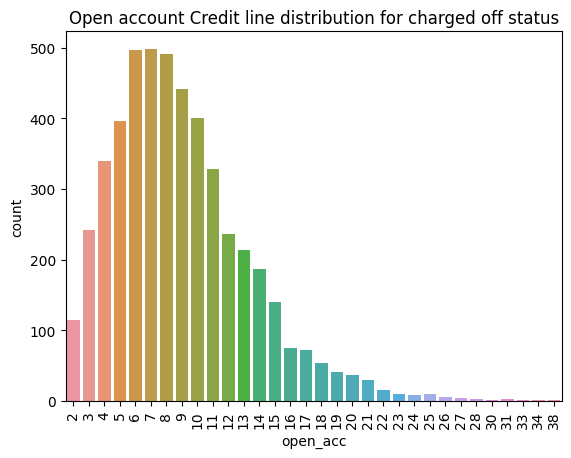

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='open_acc')
plt.xticks(rotation=90)
plt.title("Open account Credit line distribution for charged off status")
plt.show()

People who have 6,7,8 pre approved open credit line in their credit file are mostly comes under defaulters.

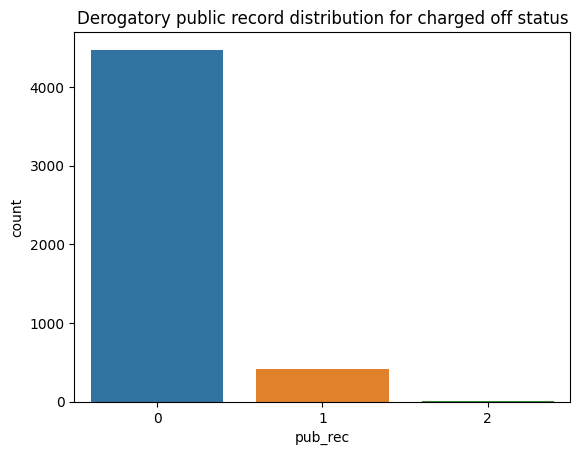

In [ ]:
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='pub_rec')
plt.title("Derogatory public record distribution for charged off status")
plt.show()

People who have 0 in derogatory public records in their credit file are mostly marked as defaulters.

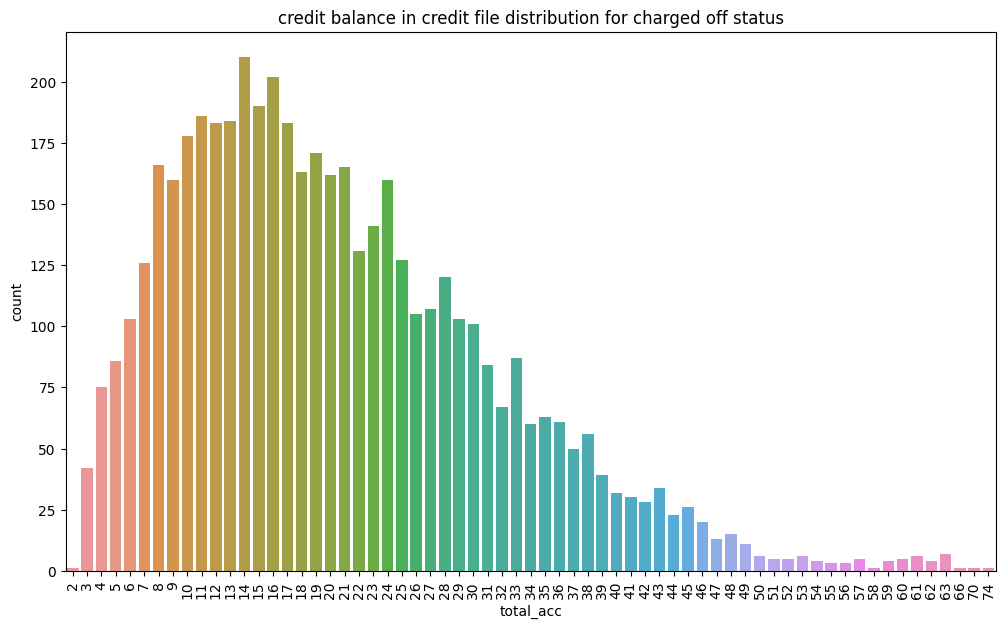

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data[data.loan_status == 'Charged Off'], x='total_acc')
plt.title("credit balance in credit file distribution for charged off status")
plt.xticks(rotation=90)
plt.show()

People who have 14, 16 credit balance in their credit file are mostly marked as defaulters.

## **Bivariate and Multi-variate analysis**

Text(0.5, 1.0, 'Loan Status vs interest rate')

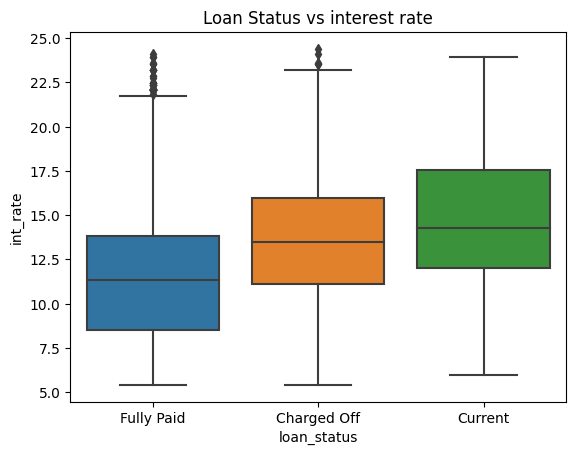

In [ ]:
sns.boxplot(data=data, x='loan_status', y='int_rate')
plt.title("Loan Status vs interest rate")

When the intrest rate increase, there is more chance of getting defaulters.

In [ ]:
data['annual_inc_groups'] = pd.cut(data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

Text(0.5, 1.0, 'Loan amount vs annual income group')

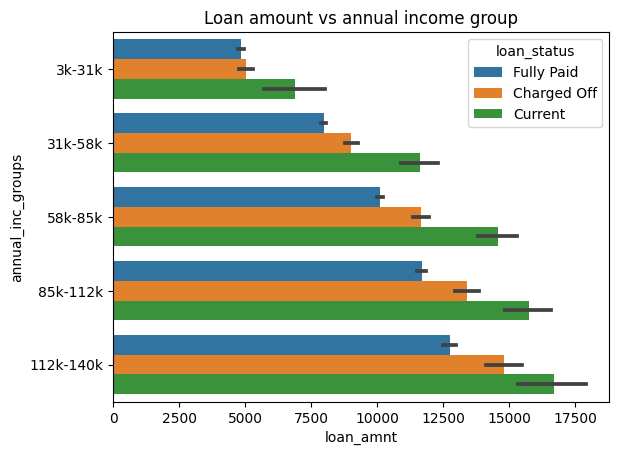

In [ ]:
sns.barplot(data=data, x='loan_amnt', y='annual_inc_groups', hue='loan_status')
plt.title("Loan amount vs annual income group")

From the above visualization, we observe that, across from all annual income group more poeple are defaulters. Over that, people who brought high loan amount not paying the amount back.

Text(0.5, 1.0, 'Intrest rate vs funded_amount by investors group')

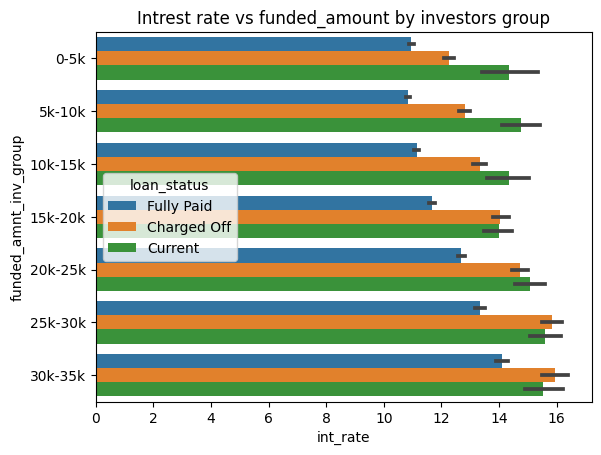

In [ ]:
sns.barplot(data=data, x='int_rate', y='funded_amnt_inv_group', hue='loan_status')
plt.title("Intrest rate vs funded_amount by investors group")

From the above visualization, we observe that, across from all loan group more poeple are defaulters. Over, funded amount by the inversters by the range of 25k-30k are mostly defaulters.

Text(0.5, 1.0, 'Term vs intrest rate')

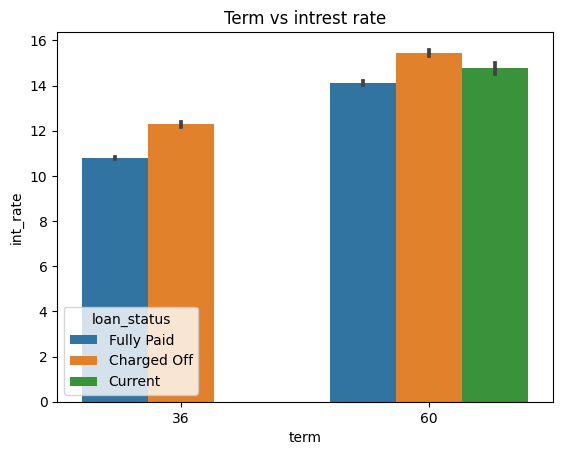

In [ ]:
sns.barplot(data=data, x='term', y='int_rate', hue='loan_status')
plt.title("Term vs intrest rate")

People who took the loan for 60 months term period with high intrest rate are finding deficulties in repaying the amount.

Text(0.5, 1.0, 'Annual income vs home ownership')

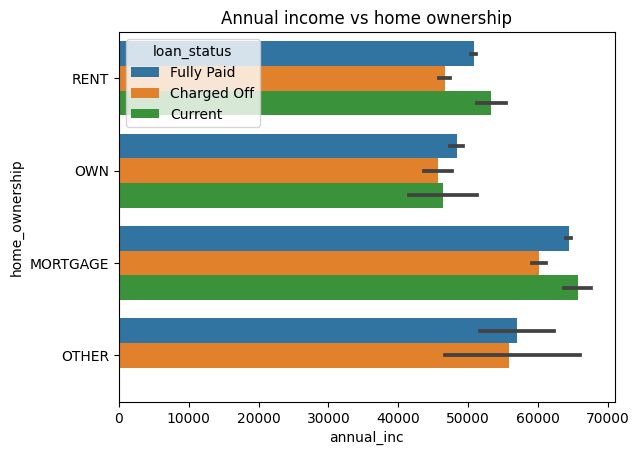

In [ ]:
sns.barplot(data=data, x='annual_inc', y='home_ownership', hue='loan_status')
plt.title("Annual income vs home ownership")

From the above visualization, we observe that, people who lives any type of house are mostly paying their amount back, but who lives in MORTGAGE are getting high annual income and they are mostly comes under defaulters.

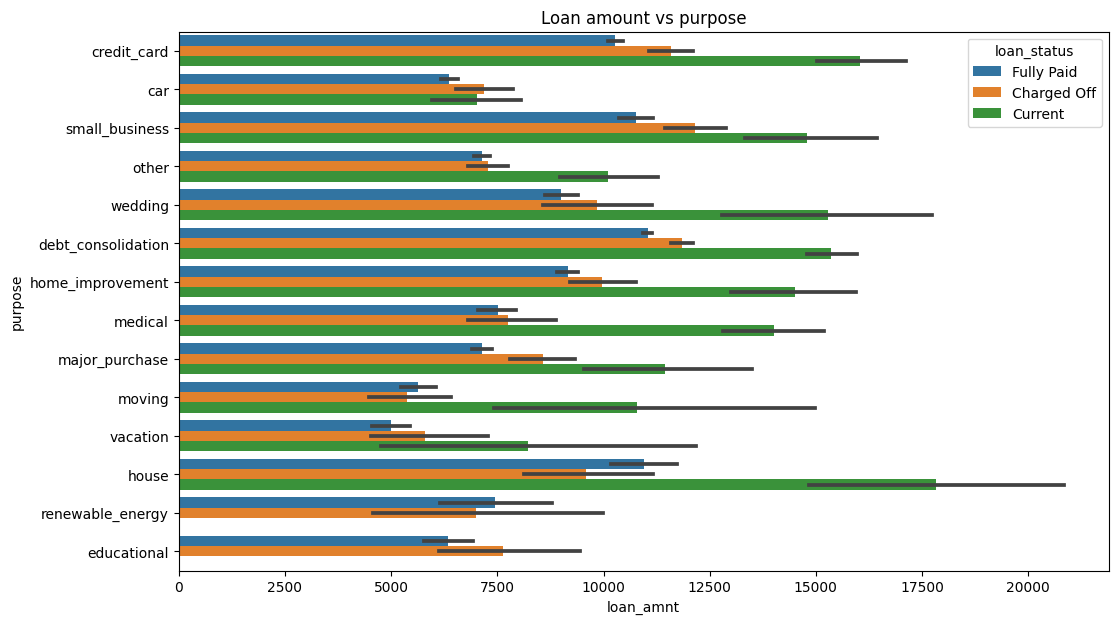

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x='loan_amnt', y='purpose', hue='loan_status')
plt.title("Loan amount vs purpose")
plt.show()

Here we have a intresting fact, people who brought the loan for the purpose of either house, renewable_energy are mostly paid their amount to the finance. and other are likely not paying back the amount.

Text(0.5, 1.0, 'Home Ownership vs loan amount')

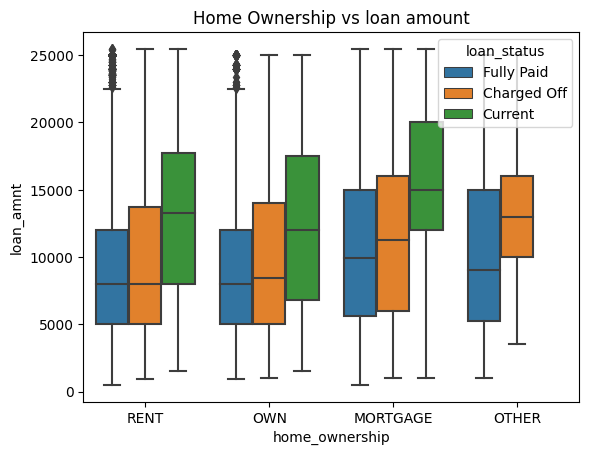

In [ ]:
sns.boxplot(data=data, x='home_ownership', y='loan_amnt', hue='loan_status')
plt.title("Home Ownership vs loan amount")

From this point of view, we can see that OTHER people are taking more loan amount and not paying back also.

Text(0.5, 1.0, 'Loan amount vs issue month')

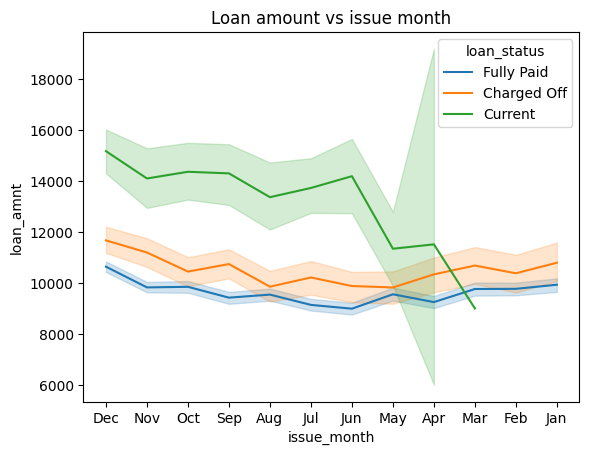

In [ ]:
sns.lineplot(data =data,y='loan_amnt', x='issue_month', hue ='loan_status')
plt.title("Loan amount vs issue month")

From this, people who taken the loan of end of the year are mostly not repaying the amount.

Text(0.5, 1.0, 'Loan amount vs issue year')

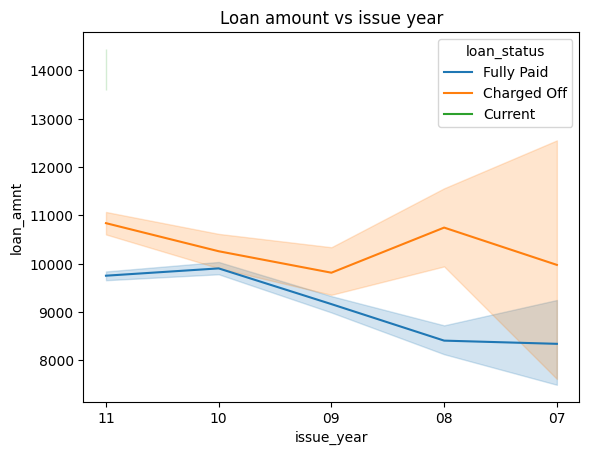

In [ ]:
sns.lineplot(data =data,y='loan_amnt', x='issue_year', hue ='loan_status')
plt.title("Loan amount vs issue year")

There is huge gap betwween the people who paid the amount and not pay the amount during the year 2007, 2008

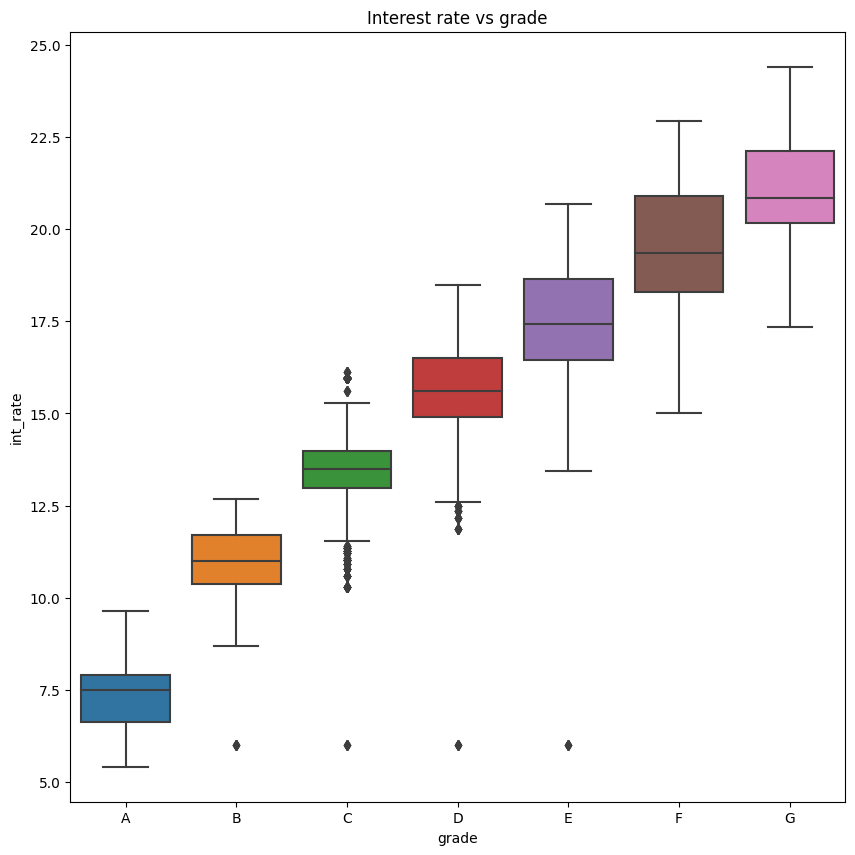

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data =data,x='grade', y='int_rate', order=sorted(data['grade'].unique()))
plt.title("Interest rate vs grade")
plt.show()

almost all values are lies between same range, going with higher group like F, G are getting more intrest rate.

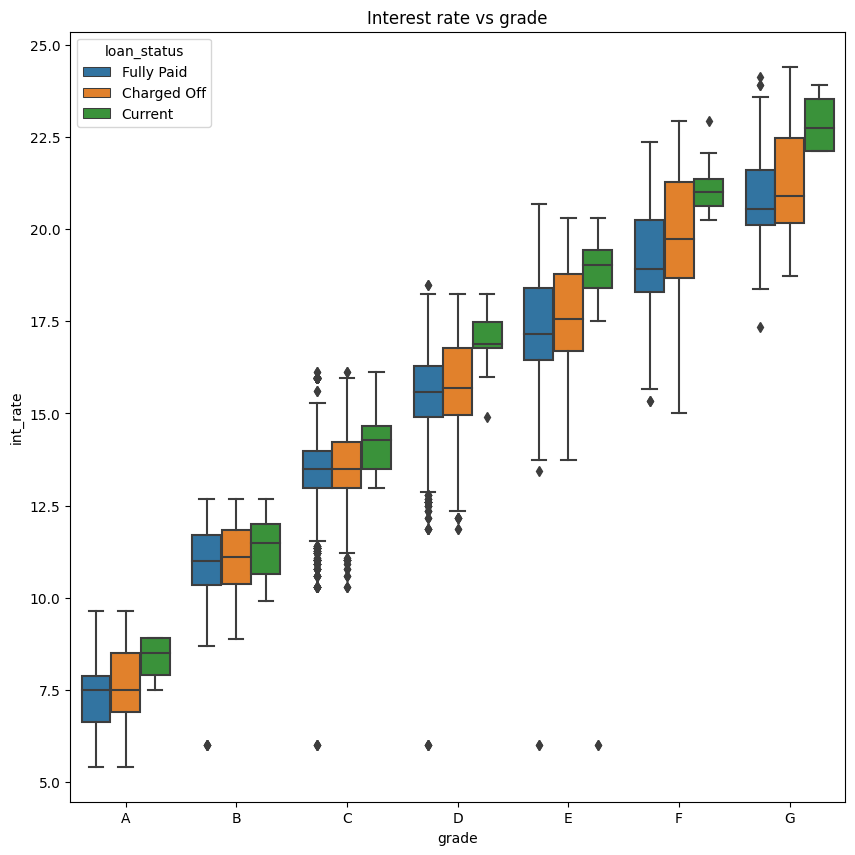

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data =data,x='grade', y='int_rate', hue='loan_status' , order=sorted(data['grade'].unique()))
plt.title("Interest rate vs grade")
plt.show()

As the lower graded peoples are getting their loans at higher intrestrate, so that they can't to pay the amount back and comes under defaulted category.

Text(0.5, 1.0, 'Employee length vs DTI')

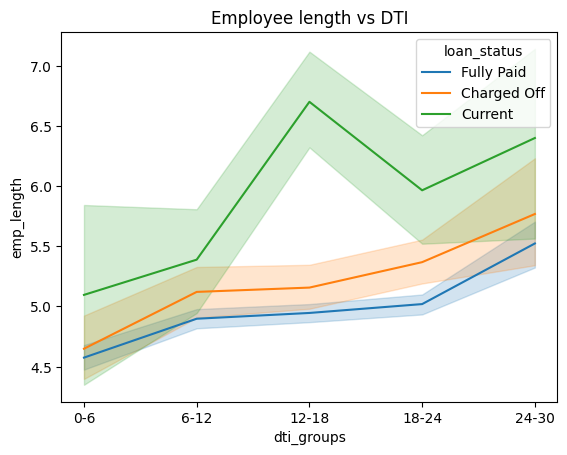

In [ ]:
sns.lineplot(data =data,y='emp_length', x='dti_groups', hue ='loan_status')
plt.title("Employee length vs DTI")

Text(0.5, 1.0, 'Loan amount vs DTI')

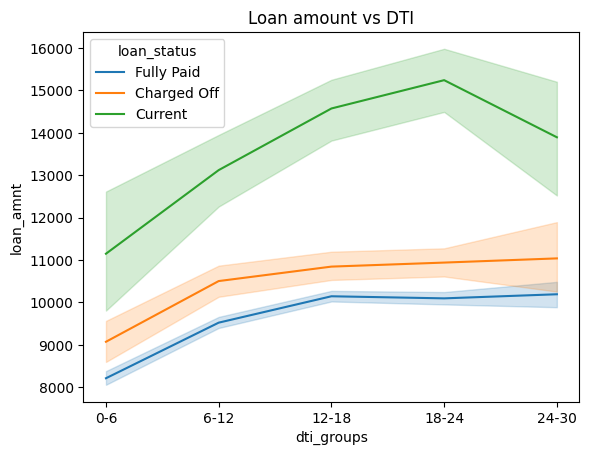

In [ ]:
sns.lineplot(data =data,y='loan_amnt', x='dti_groups', hue ='loan_status')
plt.title("Loan amount vs DTI")

Here we have the clear visibility that, people who have more dti value in their credit file are mostly falls under defaulters.

Text(0.5, 1.0, 'Loan amount vs open account in credit file')

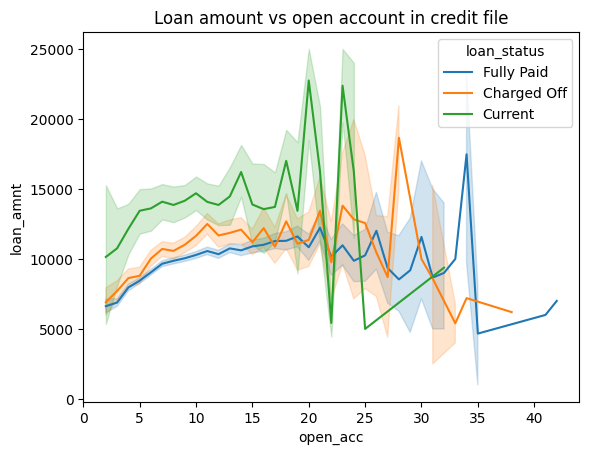

In [ ]:
sns.lineplot(data =data,y='loan_amnt', x='open_acc', hue ='loan_status')
plt.title("Loan amount vs open account in credit file")

People who have the pre approved loan range between 20-25 are taken the loan amount between 10k - 20k are mostly lies under defaulters.

Text(0.5, 1.0, 'Intrest rate vs total account balance in credit file')

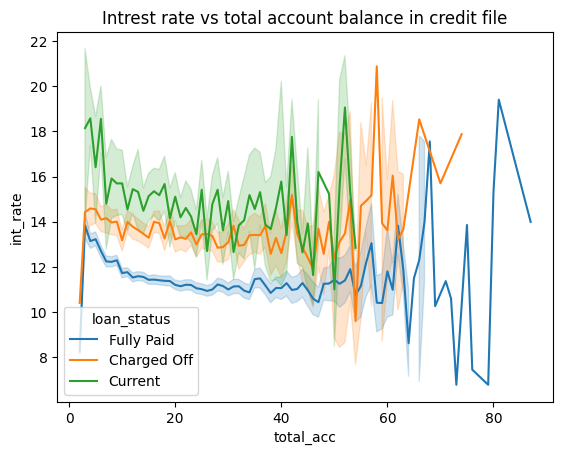

In [ ]:
sns.lineplot(data =data,y='int_rate', x='total_acc', hue ='loan_status')
plt.title("Intrest rate vs total account balance in credit file")

Text(0.5, 1.0, 'Intrest rate vs public record')

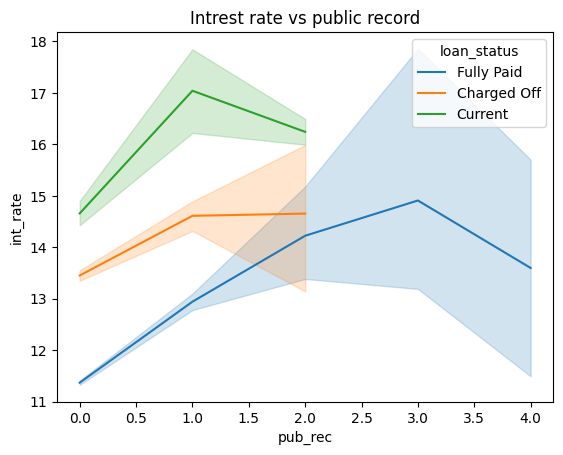

In [ ]:
sns.lineplot(data =data,y='int_rate', x='pub_rec', hue ='loan_status')
plt.title("Intrest rate vs public record")

Text(0.5, 1.0, 'Intrest rate vs open account in credit file')

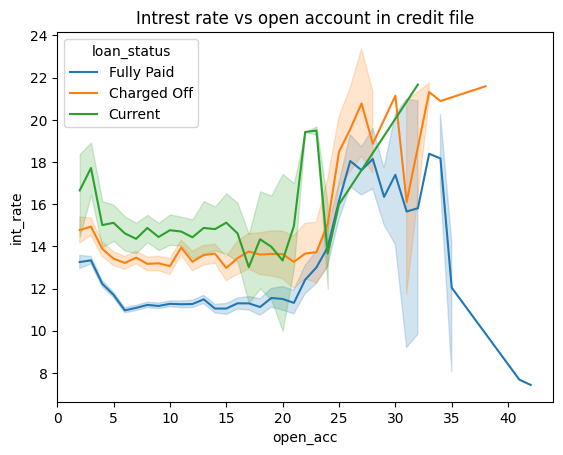

In [ ]:
sns.lineplot(data =data,y='int_rate', x='open_acc', hue ='loan_status')
plt.title("Intrest rate vs open account in credit file")

## **Comparision between Fully Paid vs Least Paid**

In [ ]:
fully_paid=data[data["loan_status"]=="Fully Paid"]
fully_paid.shape

(28251, 29)

In [ ]:
f=fully_paid[['grade','sub_grade']]
f.describe()

,grade,sub_grade
count,28251,28251
unique,7,35
top,B,A4
freq,8901,2372


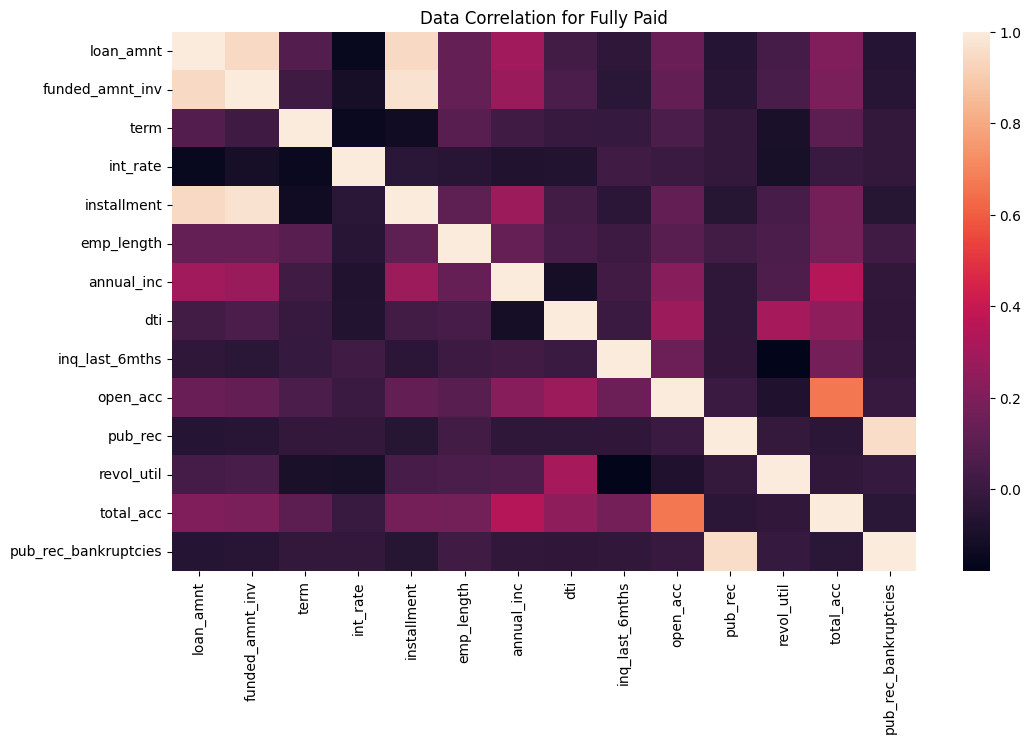

In [ ]:
fb=fully_paid[(fully_paid["grade"]=="A") & (fully_paid["sub_grade"]=="A4")]
plt.figure(figsize=(12,7))
sns.heatmap(fb.corr())
plt.title("Data Correlation for Fully Paid")
plt.show()

#### Observation:- Factors due to which Individual is likely to fully pay the LOAN
| Findings | Ideal Situation | Explanation |
| :- | -: | :-: |
| 1. Terms_in_month is inversely proportional to Installments  | Yes | As number of Term months are completing the installment are reducing, That means they are paying installments on Time |
| 2. Relative Terms_in_months is 36 months | Yes | For 36 months they are paying 13% interest which is one of the factors to succeed |
| 3. Median of DTI is 12.0 | Yes | Individual is able to manage Debit to Income ratio |
| 4. Loan Amount is Comparatively Low (mean :- 8482)| Yes | Less Loan amount is easy to pay back |
| 5. Grade A of Sub Grade A4 is the best Grade | Yes | |

In [ ]:
least_paid = data[(data["loan_status"]=="Charged Off") ]
least_paid.shape

(4897, 29)

In [ ]:
l=least_paid[['grade','sub_grade']]
l.describe()

,grade,sub_grade
count,4897,4897
unique,7,35
top,B,B5
freq,1294,328


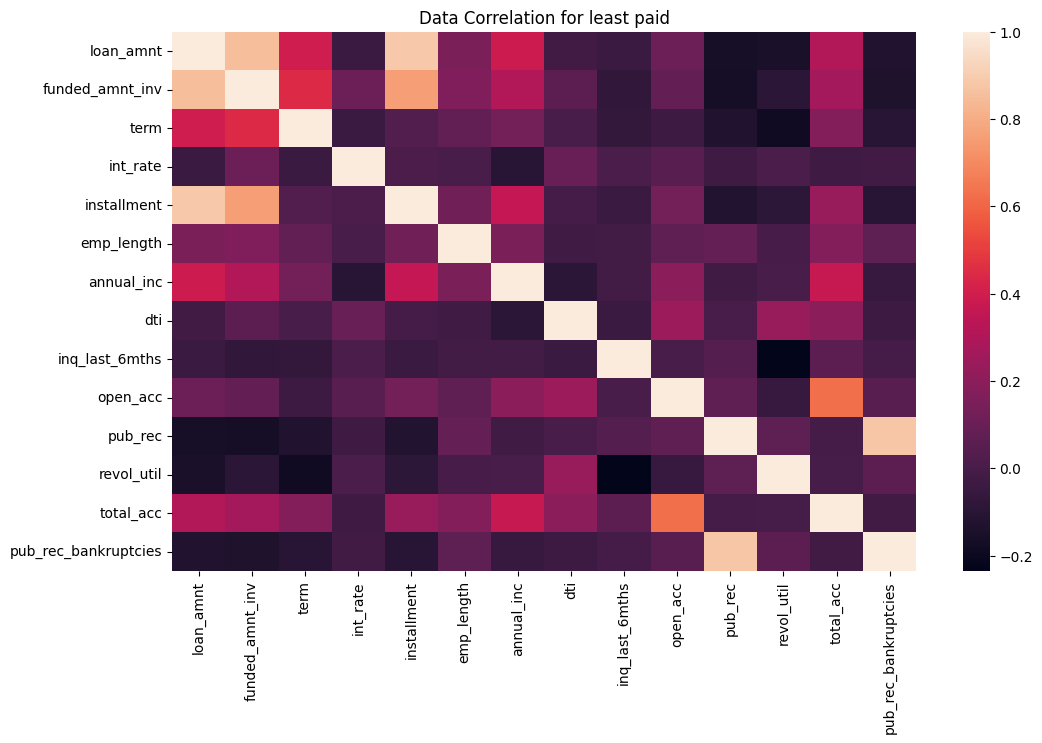

In [ ]:
lb=least_paid[(least_paid["grade"]=="B") & (least_paid["sub_grade"]=="B5")]
plt.figure(figsize=(12,7))
sns.heatmap(lb.corr())
plt.title("Data Correlation for least paid")
plt.show()

#### Observations:-
| Findings | Ideal Situation | Explanation |
| :- | -: | :-: |
| 1. Terms_in_month is proportional to Installments  | NO | As number of Term months are completing the installment are not reducing, Means Individuals are not Paying installments on Time |
| 2. Relative Terms_in_months is 60 months | NO | For 60 months they are paying 15% interest rate which is one of the factors to default |
| 3. Median of DTI is 14.06 | Likely NO | Individual may not be able to manage Debit to Income ratio |
| 4. Loan Amount Taken is more (mean :- 9907)  | Likey NO | Big Loan amounts hard to pay back |
| 5. Grade B of Sub-Grade B5 is the most frequent type and most likely to default | Likely NO | Installment is negatively proportioanl to DTI , Most probably they are left with no income after installment or They are paying installment by taking some other loan 2. More Loan applicants are form this Sub-grade |

### **Analysis of top 20 states**

<Axes: >

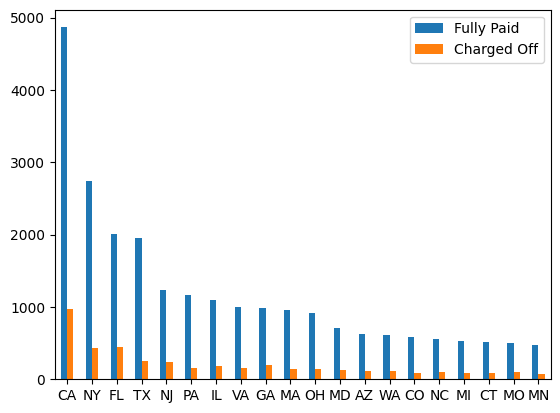

In [ ]:
fully_paid_df = fully_paid['addr_state'].value_counts().rename_axis('states').reset_index(name='fully_paid_freq')
charged_off_df = least_paid['addr_state'].value_counts().rename_axis('states').reset_index(name='least_paid_freq')
merged_df = pd.merge(fully_paid_df, charged_off_df, on='states')

fully_paid_freq_arr = merged_df["fully_paid_freq"]
least_paid_freq_arr = merged_df["least_paid_freq"]
index = merged_df['states']

state_df = pd.DataFrame({'Fully Paid': np.array(fully_paid_freq_arr),
                   'Charged Off': np.array(least_paid_freq_arr)},
                  index=np.array(index))
state_df[:20].plot.bar(rot=0)

**Observation**

From the Graph above "CA" is the state which has largest number of Applicants and Fully Paid Applicants

<Axes: >

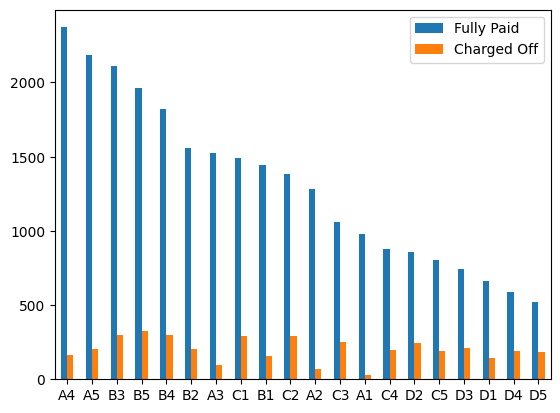

In [ ]:
fp_sub_grade=fully_paid["sub_grade"].value_counts().rename_axis('sub_grade').reset_index(name='fully_paid_freq')
charged_off_sub_grade = least_paid['sub_grade'].value_counts().rename_axis('sub_grade').reset_index(name='least_paid_freq')

merged_df = pd.merge(fp_sub_grade, charged_off_sub_grade, on='sub_grade')
merged_df['success_percent'] = (merged_df["fully_paid_freq"] / (merged_df["fully_paid_freq"] + merged_df["least_paid_freq"])*100)

fully_paid_freq_arr = merged_df["fully_paid_freq"]
least_paid_freq_arr = merged_df["least_paid_freq"]
index = merged_df['sub_grade']

new_df = pd.DataFrame({'Fully Paid': np.array(fully_paid_freq_arr),
                   'Charged Off': np.array(least_paid_freq_arr)},
                  index=np.array(index))

new_df[:20].plot.bar(rot=0)

In [ ]:
def risk_fuction(percen):
    if(percen>90):
        return "No Risk"
    elif (percen>70):
        return "Good"
    elif (percen>55):
        return "Average Can be Considered"
    else:
        return "Reject"

merged_df['risk_factor']=merged_df["success_percent"].apply(risk_fuction) # Driven Columns
merged_df.sort_values(by="success_percent", ascending=False)

,sub_grade,fully_paid_freq,least_paid_freq,success_percent,risk_factor
12,A1,978,30,97.023810,No Risk
10,A2,1284,71,94.760148,No Risk
6,A3,1525,95,94.135802,No Risk
0,A4,2372,166,93.459417,No Risk
1,A5,2183,207,91.338912,No Risk
8,B1,1443,160,90.018715,No Risk
5,B2,1558,204,88.422247,Good
2,B3,2112,301,87.525901,Good
4,B4,1823,301,85.828625,Good
3,B5,1965,328,85.695595,Good


## **Observation Result**

Here we the final result message from our exploratory data analysis (EDA) process conducted on the "loan.csv" dataset. The objective of this analysis was to gain insights into the dataset, particularly identifying individuals who may fall into the "defaulter" category. These findings are crucial for decision-making in the context of loan approval, as it helps assess the risk associated with potential borrowers.

**Summary of Visualization and Key Insights:**
1.  **Data Overview:** We began by gaining a comprehensive understanding of the dataset. It contains 39717 records and 111 features, with each row representing a loan applicant.

2.  **Data Quality:** We assessed data quality and found that irrelavent, NA, single value columns and Outliers. These issues were addressed appropriately during data preprocessing.

3.  **Feature Distributions:** We visualized the distributions of key features such as credit score, income, employment history, and debt-to-income ratio. This provided us with a clear view of the dataset's characteristics.

4.  **Defaulters Identification:** We visually represented and identified the peoples who have more chance of getting defaulter.